In [1]:
import numpy as np
from numpy.linalg import det, inv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1

In [2]:
a1 = [1,0]; a2=[0,1];
A  = np.transpose([a1,a2]);

theta =  np.pi/4;
R = [ [ np.cos(theta), -np.sin(theta)], [ np.sin(theta),  np.cos(theta)] ];

b1 = np.sqrt(2)*np.dot(R,a1);  b2 =a2 #np.sqrt(2)*np.dot(R,a2); #a2
#b1 = [np.sqrt(2),0]; b2=[0,np.sqrt(2)];

B  = np.transpose([b1,b2]);

a = A#np.array([[0,1],[1,0]])
b = B#np.array([[0,5],[5,0]])

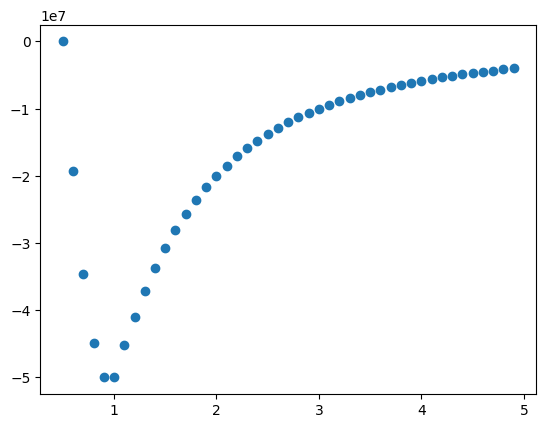

In [3]:
def at_sin(x, up =99999999):
    
    tr_x= (x + 0.5)
    
    if x<1:
        res = up*(1/(1+np.sqrt((x**2))) )* np.sin(tr_x*np.pi) +1/(x+0.00000000000001)
    else:
        res = (x-1)**2 -up*(1/(1+x**2))+1/(x+0.00000000000001)
    return res

X = [i*0.1 for i in range(0,50,1)]
Y= [at_sin(x) for x in X]

plt.scatter(X[5:],Y[5:])

In [5]:
# a = np.array([[0,1],[1,0]])
# b = np.sqrt(2)*np.array([[0,5],[5,0]])
eps = 0.0001

bond=10

def tAtB(params):
    tA = np.array([[params[0],params[1]],
                   [params[2],params[3]]])
    
    tB = np.dot(np.dot(tA,a), inv(b)) # tAa=tBb
    
    return tA, tB
          
def fit_fucntion(params , k_p=999):
          
        tA, tB= tAtB(params)
        tAa= np.dot(tA,a)
        tBb= np.dot(tB,b)
        
        # main condition
        zero_mat= tAa - tBb
        s=0
        for row in zero_mat:
            for e in row:
                s+=e*e
        
        # mimimum TA
        detTAa= det(tAa)*det(tAa) # minimum but biger than 0
        detTBb= det(tBb)*det(tBb)
        
        # TB integer 
        cons =9999999
        tB_con = 0  
        for row in tB:
            for e in row:
                tB_con += ((round(e)-e))*((round(e)-e)) # e*e
        tB_con = tB_con*cons
        
        tA_lenghth =((tA[0][0]**2+tA[0][1]**2)+(tA[1][0]**2+tA[1][1]**2) )*100
        
        
        f =  at_sin(detTAa)+ tB_con**2 +tA_lenghth
        #((1-detTAa)**2)*k_p + tB_con**2
        
        
        return f 

In [6]:
# Experiment settings

#Hyperparameters of the model
up = 99999999
model_par = {
    
    'initialTemp': 4, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-2*bond,2*bond] for _ in range(4)],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':3,
    
    'known_min': -up
    
}



#
input_size = 4 # since our function has one variable this is a trivial scenario.
start_point = [1,5,3,2]

# Experiment
experiment = Annealing1(fit_fucntion ,start_point, model_par)

In [7]:
epochs= 40
history_book = experiment.evolve( epochs, prints_p=5)

temp:4|epoch:0|change:-8596.141885601362|value:20026.708685294136
temp:4|epoch:5|change:33370795.29408155|value:20026.708685294136
temp:4|epoch:10|change:100000105882042.62|value:-5873843.632352954
temp:4|epoch:15|change:23729114.03054525|value:-5873843.632352954
temp:4|epoch:20|change:14388356.87221975|value:-5873843.632352954
temp:4|epoch:25|change:8448705.570493603|value:-5873843.632352954
temp:4|epoch:30|change:6127305.752836022|value:-5873843.632352954
temp:4|epoch:35|change:24863663.362417266|value:-5873843.632352954
temp:0.0975609756097561|epoch:0|change:629062112.4719316|value:-5873843.632352954
temp:0.0975609756097561|epoch:5|change:-7599.9999999869615|value:-5881443.632352941
temp:0.0975609756097561|epoch:10|change:50013000.510000005|value:-49998198.50000001
temp:0.0975609756097561|epoch:15|change:128076022.21929178|value:-49998198.50000001
temp:0.0975609756097561|epoch:20|change:50033525.2086853|value:-49998198.50000001
temp:0.0975609756097561|epoch:25|change:50345522.094468

temp:0.007130124777183602|epoch:20|change:50050099.23483987|value:-49998498.49999998
temp:0.007130124777183602|epoch:25|change:50717757.1148693|value:-49998498.49999998
temp:0.007130124777183602|epoch:30|change:100000149999497.5|value:-49998498.49999998
temp:0.007130124777183602|epoch:35|change:49613318.508025266|value:-49998498.49999998
temp:0.006655574043261232|epoch:0|change:50031125.20868527|value:-49998498.49999998
temp:0.006655574043261232|epoch:5|change:50618024.80891373|value:-49998498.49999998
temp:0.006655574043261232|epoch:10|change:49924322.52623574|value:-49998498.49999998
temp:0.006655574043261232|epoch:15|change:115618797.97596556|value:-49998498.49999998
temp:0.006655574043261232|epoch:20|change:67860168.89819233|value:-49998498.49999998
temp:0.006655574043261232|epoch:25|change:53121135.363762096|value:-49998498.49999998
temp:0.006655574043261232|epoch:30|change:50197384.31586984|value:-49998498.49999998
temp:0.006655574043261232|epoch:35|change:50334622.09446856|value

temp:0.0034453057708871667|epoch:0|change:479971123.2674802|value:-49998498.5
temp:0.0034453057708871667|epoch:5|change:50111874.91348108|value:-49998498.5
temp:0.0034453057708871667|epoch:10|change:60565893.02702434|value:-49998498.5
temp:0.0034453057708871667|epoch:15|change:50239460.62048307|value:-49998498.5
temp:0.0034453057708871667|epoch:20|change:50016368.84025463|value:-49998498.5
temp:0.0034453057708871667|epoch:25|change:61320858.66364056|value:-49998498.5
temp:0.0034453057708871667|epoch:30|change:50334622.09446858|value:-49998498.5
temp:0.0034453057708871667|epoch:35|change:50930690.21991788|value:-49998498.5
temp:0.0033305578684429643|epoch:0|change:52581260.43814065|value:-49998498.5
temp:0.0033305578684429643|epoch:5|change:44133554.86764711|value:-49998498.5
temp:0.0033305578684429643|epoch:10|change:49924022.52623576|value:-49998498.5
temp:0.0033305578684429643|epoch:15|change:48780150.428184286|value:-49998498.5
temp:0.0033305578684429643|epoch:20|change:50005200.51|

temp:0.0023242300987797795|epoch:35|change:54886342.007314205|value:-49999698.5
temp:0.0022714366837024423|epoch:0|change:51347648.66944229|value:-49999698.5
temp:0.0022714366837024423|epoch:5|change:49848030.13265175|value:-49999698.5
temp:0.0022714366837024423|epoch:10|change:50933490.21991788|value:-49999698.5
temp:0.0022714366837024423|epoch:15|change:50110074.91348108|value:-49999698.5
temp:0.0022714366837024423|epoch:20|change:50818776.04447464|value:-49999698.5
temp:0.0022714366837024423|epoch:25|change:79991920.16535716|value:-49999698.5
temp:0.0022714366837024423|epoch:30|change:49928422.52623576|value:-49999698.5
temp:0.0022714366837024423|epoch:35|change:72673994.08853403|value:-49999698.5
temp:0.0022209883398112166|epoch:0|change:49994359.25617378|value:-49999698.5
temp:0.0022209883398112166|epoch:5|change:50822276.04447464|value:-49999698.5
temp:0.0022209883398112166|epoch:10|change:50535694.334085375|value:-49999698.5
temp:0.0022209883398112166|epoch:15|change:55777981.15

temp:0.0017233950883239987|epoch:30|change:50046820.49083752|value:-49999698.5
temp:0.0017233950883239987|epoch:35|change:53753096.82031081|value:-49999698.5
temp:0.0016941973739940707|epoch:0|change:51341448.66944229|value:-49999698.5
temp:0.0016941973739940707|epoch:5|change:51192458.17834141|value:-49999698.5
temp:0.0016941973739940707|epoch:10|change:50040520.49083752|value:-49999698.5
temp:0.0016941973739940707|epoch:15|change:52092099.54221353|value:-49999698.5
temp:0.0016941973739940707|epoch:20|change:52092399.54221353|value:-49999698.5
temp:0.0016941973739940707|epoch:25|change:85157979.65546468|value:-49999698.5
temp:0.0016941973739940707|epoch:30|change:50106774.91348108|value:-49999698.5
temp:0.0016941973739940707|epoch:35|change:50132731.17262629|value:-49999698.5
temp:0.0016659725114535613|epoch:0|change:44123054.86764706|value:-49999698.5
temp:0.0016659725114535613|epoch:5|change:49929122.52623576|value:-49999698.5
temp:0.0016659725114535613|epoch:10|change:49985859.4123

temp:0.0013693940431359125|epoch:15|change:50539794.334085375|value:-49999698.5
temp:0.0013693940431359125|epoch:20|change:51192458.17834141|value:-49999698.5
temp:0.0013693940431359125|epoch:25|change:50136031.17262629|value:-49999698.5
temp:0.0013693940431359125|epoch:30|change:54107250.11397357|value:-49999698.5
temp:0.0013693940431359125|epoch:35|change:50395418.50225792|value:-49999698.5
temp:0.0013508949679162446|epoch:0|change:59845513.33203077|value:-49999698.5
temp:0.0013508949679162446|epoch:5|change:49928422.52623576|value:-49999698.5
temp:0.0013508949679162446|epoch:10|change:50203084.31586986|value:-49999698.5
temp:0.0013508949679162446|epoch:15|change:100000150000697.5|value:-49999698.5
temp:0.0013508949679162446|epoch:20|change:53760096.820310816|value:-49999698.5
temp:0.0013508949679162446|epoch:25|change:51054532.133636825|value:-49999698.5
temp:0.0013508949679162446|epoch:30|change:50007300.51|value:-49999698.5
temp:0.0013508949679162446|epoch:35|change:65758616.15223

temp:0.001136040897472309|epoch:5|change:49617418.50802529|value:-49999698.5
temp:0.001136040897472309|epoch:10|change:50162374.50641248|value:-49999698.5
temp:0.001136040897472309|epoch:15|change:53116435.36376212|value:-49999698.5
temp:0.001136040897472309|epoch:20|change:50024225.208685294|value:-49999698.5
temp:0.001136040897472309|epoch:25|change:59842713.332030736|value:-49999698.5
temp:0.001136040897472309|epoch:30|change:50343022.09446858|value:-49999698.5
temp:0.001136040897472309|epoch:35|change:49969870.547468945|value:-49999698.5
temp:0.0011232799775344005|epoch:0|change:50536594.334085375|value:-49999698.5
temp:0.0011232799775344005|epoch:5|change:52089999.54221353|value:-49999698.5
temp:0.0011232799775344005|epoch:10|change:53118835.36376212|value:-49999698.5
temp:0.0011232799775344005|epoch:15|change:50535394.334085375|value:-49999698.5
temp:0.0011232799775344005|epoch:20|change:50031521.350570895|value:-49999698.5
temp:0.0011232799775344005|epoch:25|change:50289925.1573

temp:0.0009706381946129574|epoch:0|change:52565460.438140646|value:-49999698.5
temp:0.0009706381946129574|epoch:5|change:68984218.23006432|value:-49999698.5
temp:0.0009706381946129574|epoch:10|change:50109574.91348108|value:-49999698.5
temp:0.0009706381946129574|epoch:15|change:124811401.16331029|value:-49999698.5
temp:0.0009706381946129574|epoch:20|change:50814276.04447464|value:-49999698.5
temp:0.0009706381946129574|epoch:25|change:57896049.82685912|value:-49999698.5
temp:0.0009706381946129574|epoch:30|change:51055932.133636825|value:-49999698.5
temp:0.0009706381946129574|epoch:35|change:49842030.13265175|value:-49999698.5
temp:0.0009613073780341257|epoch:0|change:58509411.73986679|value:-49999698.5
temp:0.0009613073780341257|epoch:5|change:50039720.49083752|value:-49999698.5
temp:0.0009613073780341257|epoch:10|change:50243060.62048307|value:-49999698.5
temp:0.0009613073780341257|epoch:15|change:49930822.52623576|value:-49999698.5
temp:0.0009613073780341257|epoch:20|change:50041320.4

temp:0.0008545182653279207|epoch:0|change:50025125.208685294|value:-49999698.5
temp:0.0008545182653279207|epoch:5|change:52320355.27502267|value:-49999698.5
temp:0.0008545182653279207|epoch:10|change:49983459.41237872|value:-49999698.5
temp:0.0008545182653279207|epoch:15|change:50006000.51|value:-49999698.5
temp:0.0008545182653279207|epoch:20|change:50241860.62048307|value:-49999698.5
temp:0.0008545182653279207|epoch:25|change:49996159.41237872|value:-49999698.5
temp:0.0008545182653279207|epoch:30|change:50070097.648297966|value:-49999698.5
temp:0.0008545182653279207|epoch:35|change:50461204.67208744|value:-49999698.5
temp:0.0008472781190425751|epoch:0|change:50199484.31586986|value:-49999698.5
temp:0.0008472781190425751|epoch:5|change:50335622.09446858|value:-49999698.5
temp:0.0008472781190425751|epoch:10|change:50245960.62048307|value:-49999698.5
temp:0.0008472781190425751|epoch:15|change:50013168.84025463|value:-49999698.5
temp:0.0008472781190425751|epoch:20|change:52318655.27502267

temp:0.0007632131272657885|epoch:35|change:50283525.15739239|value:-49999698.5
temp:0.0007574323044877859|epoch:0|change:58517411.73986679|value:-49999698.5
temp:0.0007574323044877859|epoch:5|change:50067197.648297966|value:-49999698.5
temp:0.0007574323044877859|epoch:10|change:50088045.21413524|value:-49999698.5
temp:0.0007574323044877859|epoch:15|change:50395118.50225792|value:-49999698.5
temp:0.0007574323044877859|epoch:20|change:49988259.41237872|value:-49999698.5
temp:0.0007574323044877859|epoch:25|change:50621624.80891375|value:-49999698.5
temp:0.0007574323044877859|epoch:30|change:100000150010097.5|value:-49999698.5
temp:0.0007574323044877859|epoch:35|change:53117235.36376212|value:-49999698.5
temp:0.000751738395038526|epoch:0|change:68992518.23006432|value:-49999698.5
temp:0.000751738395038526|epoch:5|change:49930022.52623576|value:-49999698.5
temp:0.000751738395038526|epoch:10|change:49849630.13265175|value:-49999698.5
temp:0.000751738395038526|epoch:15|change:50403818.5022579

temp:0.0006848142441362772|epoch:25|change:50086545.21413524|value:-49999698.5
temp:0.0006848142441362772|epoch:30|change:50340122.09446858|value:-49999698.5
temp:0.0006848142441362772|epoch:35|change:50467704.67208744|value:-49999698.5
temp:0.0006801564359802748|epoch:0|change:50046820.49083752|value:-49999698.5
temp:0.0006801564359802748|epoch:5|change:50335222.09446858|value:-49999698.5
temp:0.0006801564359802748|epoch:10|change:54105750.11397357|value:-49999698.5
temp:0.0006801564359802748|epoch:15|change:50544594.334085375|value:-49999698.5
temp:0.0006801564359802748|epoch:20|change:50243460.62048307|value:-49999698.5
temp:0.0006801564359802748|epoch:25|change:50351222.09446858|value:-49999698.5
temp:0.0006801564359802748|epoch:30|change:58514211.73986679|value:-49999698.5
temp:0.0006801564359802748|epoch:35|change:50015968.84025463|value:-49999698.5
temp:0.0006755615605472042|epoch:0|change:50544894.334085375|value:-49999698.5
temp:0.0006755615605472042|epoch:5|change:52831863.11

temp:0.0006210215804999219|epoch:15|change:53118735.36376212|value:-49999698.5
temp:0.0006210215804999219|epoch:20|change:50347822.09446858|value:-49999698.5
temp:0.0006210215804999219|epoch:25|change:51883669.14355056|value:-49999698.5
temp:0.0006210215804999219|epoch:30|change:50110074.91348108|value:-49999698.5
temp:0.0006210215804999219|epoch:35|change:54482201.166366644|value:-49999698.5
temp:0.0006171887054466898|epoch:0|change:50137531.17262629|value:-49999698.5
temp:0.0006171887054466898|epoch:5|change:61324758.66364056|value:-49999698.5
temp:0.0006171887054466898|epoch:10|change:44129054.86764707|value:-49999698.5
temp:0.0006171887054466898|epoch:15|change:50162474.50641248|value:-49999698.5
temp:0.0006171887054466898|epoch:20|change:49974270.547468945|value:-49999698.5
temp:0.0006171887054466898|epoch:25|change:49622518.50802529|value:-49999698.5
temp:0.0006171887054466898|epoch:30|change:50006000.51|value:-49999698.5
temp:0.0006171887054466898|epoch:35|change:50000659.256173

temp:0.0005746300818847864|epoch:35|change:52097499.54221353|value:-49999698.5
temp:0.0005713469504356518|epoch:0|change:50166774.50641248|value:-49999698.5
temp:0.0005713469504356518|epoch:5|change:57903149.826859124|value:-49999698.5
temp:0.0005713469504356518|epoch:10|change:50337422.09446858|value:-49999698.5
temp:0.0005713469504356518|epoch:15|change:100000150008697.5|value:-49999698.5
temp:0.0005713469504356518|epoch:20|change:134935922.3227328|value:-49999698.5
temp:0.0005713469504356518|epoch:25|change:58509411.73986679|value:-49999698.5
temp:0.0005713469504356518|epoch:30|change:49988259.41237872|value:-49999698.5
temp:0.0005713469504356518|epoch:35|change:57896049.82685912|value:-49999698.5
temp:0.0005681011219997157|epoch:0|change:50013968.84025463|value:-49999698.5
temp:0.0005681011219997157|epoch:5|change:50240960.62048307|value:-49999698.5
temp:0.0005681011219997157|epoch:10|change:50162474.50641248|value:-49999698.5
temp:0.0005681011219997157|epoch:15|change:93053596.177

temp:0.0005262465465070385|epoch:10|change:100000150003697.5|value:-49999698.5
temp:0.0005262465465070385|epoch:15|change:104705521.6720089|value:-49999698.5
temp:0.0005262465465070385|epoch:20|change:49995559.25617378|value:-49999698.5
temp:0.0005262465465070385|epoch:25|change:49619018.50802529|value:-49999698.5
temp:0.0005262465465070385|epoch:30|change:99796321.49159078|value:-49999698.5
temp:0.0005262465465070385|epoch:35|change:50086545.21413524|value:-49999698.5
temp:0.000523491689569428|epoch:0|change:50466804.67208744|value:-49999698.5
temp:0.000523491689569428|epoch:5|change:52833863.1119107|value:-49999698.5
temp:0.000523491689569428|epoch:10|change:53753096.82031081|value:-49999698.5
temp:0.000523491689569428|epoch:15|change:58511111.73986679|value:-49999698.5
temp:0.000523491689569428|epoch:20|change:49981359.41237872|value:-49999698.5
temp:0.000523491689569428|epoch:25|change:49983759.41237872|value:-49999698.5
temp:0.000523491689569428|epoch:30|change:50713857.11486932|v

temp:0.0004925501785494397|epoch:25|change:49926022.52623576|value:-49999698.5
temp:0.0004925501785494397|epoch:30|change:51686363.96338957|value:-49999698.5
temp:0.0004925501785494397|epoch:35|change:49964270.547468945|value:-49999698.5
temp:0.0004901360127435363|epoch:0|change:50338222.09446858|value:-49999698.5
temp:0.0004901360127435363|epoch:5|change:50068097.648297966|value:-49999698.5
temp:0.0004901360127435363|epoch:10|change:48787650.42818428|value:-49999698.5
temp:0.0004901360127435363|epoch:15|change:326920398.13894945|value:-49999698.5
temp:0.0004901360127435363|epoch:20|change:50041320.49083752|value:-49999698.5
temp:0.0004901360127435363|epoch:25|change:49843530.13265175|value:-49999698.5
temp:0.0004901360127435363|epoch:30|change:50077997.648297966|value:-49999698.5
temp:0.0004901360127435363|epoch:35|change:49981359.41237872|value:-49999698.5
temp:0.0004877453969028167|epoch:0|change:53753596.820310816|value:-49999698.5
temp:0.0004877453969028167|epoch:5|change:50119474

temp:0.0004607764082478979|epoch:30|change:49846030.13265175|value:-49999698.5
temp:0.0004607764082478979|epoch:35|change:52833163.1119107|value:-49999698.5
temp:0.000458662997362688|epoch:0|change:50619224.80891375|value:-49999698.5
temp:0.000458662997362688|epoch:5|change:68989518.23006432|value:-49999698.5
temp:0.000458662997362688|epoch:10|change:434148999.2397422|value:-49999698.5
temp:0.000458662997362688|epoch:15|change:49927522.52623576|value:-49999698.5
temp:0.000458662997362688|epoch:20|change:50023825.208685294|value:-49999698.5
temp:0.000458662997362688|epoch:25|change:50019725.208685294|value:-49999698.5
temp:0.000458662997362688|epoch:30|change:56771583.718859985|value:-49999698.5
temp:0.000458662997362688|epoch:35|change:74013995.33527295|value:-49999698.5
temp:0.0004565688848304991|epoch:0|change:50239460.62048307|value:-49999698.5
temp:0.0004565688848304991|epoch:5|change:51684263.96338957|value:-49999698.5
temp:0.0004565688848304991|epoch:10|change:50053399.234839894|

temp:0.00042913850445231236|epoch:10|change:52323055.27502267|value:-49999698.5
temp:0.00042913850445231236|epoch:15|change:50002500.51|value:-49999698.5
temp:0.00042913850445231236|epoch:20|change:55769881.15376712|value:-49999698.5
temp:0.00042913850445231236|epoch:25|change:50065399.234839894|value:-49999698.5
temp:0.00042913850445231236|epoch:30|change:62968191.784229055|value:-49999698.5
temp:0.00042913850445231236|epoch:35|change:49614518.50802529|value:-49999698.5
temp:0.0004273047751308624|epoch:0|change:49976270.547468945|value:-49999698.5
temp:0.0004273047751308624|epoch:5|change:50929890.21991788|value:-49999698.5
temp:0.0004273047751308624|epoch:10|change:50198284.31586986|value:-49999698.5
temp:0.0004273047751308624|epoch:15|change:62125490.247666046|value:-49999698.5
temp:0.0004273047751308624|epoch:20|change:53762496.820310816|value:-49999698.5
temp:0.0004273047751308624|epoch:25|change:49843530.13265175|value:-49999698.5
temp:0.0004273047751308624|epoch:30|change:613220

temp:0.00040318516278600974|epoch:0|change:49846730.13265175|value:-49999698.5
temp:0.00040318516278600974|epoch:5|change:50020225.208685294|value:-49999698.5
temp:0.00040318516278600974|epoch:10|change:49992659.25617378|value:-49999698.5
temp:0.00040318516278600974|epoch:15|change:50538994.334085375|value:-49999698.5
temp:0.00040318516278600974|epoch:20|change:51341448.66944229|value:-49999698.5
temp:0.00040318516278600974|epoch:25|change:50023525.208685294|value:-49999698.5
temp:0.00040318516278600974|epoch:30|change:50288825.15739239|value:-49999698.5
temp:0.00040318516278600974|epoch:35|change:50040520.49083752|value:-49999698.5
temp:0.0004015661078205002|epoch:0|change:53428273.25052898|value:-49999698.5
temp:0.0004015661078205002|epoch:5|change:50108374.91348108|value:-49999698.5
temp:0.0004015661078205002|epoch:10|change:49927622.52623576|value:-49999698.5
temp:0.0004015661078205002|epoch:15|change:44126654.86764707|value:-49999698.5
temp:0.0004015661078205002|epoch:20|change:50

temp:0.0003831050665645057|epoch:10|change:49981659.41237872|value:-49999698.5
temp:0.0003831050665645057|epoch:15|change:50717357.11486932|value:-49999698.5
temp:0.0003831050665645057|epoch:20|change:48789350.42818428|value:-49999698.5
temp:0.0003831050665645057|epoch:25|change:50031921.350570895|value:-49999698.5
temp:0.0003831050665645057|epoch:30|change:50168774.50641248|value:-49999698.5
temp:0.0003831050665645057|epoch:35|change:50068997.648297966|value:-49999698.5
temp:0.00038164297299876003|epoch:0|change:50046820.49083752|value:-49999698.5
temp:0.00038164297299876003|epoch:5|change:99790521.49159078|value:-49999698.5
temp:0.00038164297299876003|epoch:10|change:50163274.50641248|value:-49999698.5
temp:0.00038164297299876003|epoch:15|change:49853130.13265175|value:-49999698.5
temp:0.00038164297299876003|epoch:20|change:50020325.208685294|value:-49999698.5
temp:0.00038164297299876003|epoch:25|change:49618018.50802529|value:-49999698.5
temp:0.00038164297299876003|epoch:30|change:5

temp:0.0003636033087901105|epoch:10|change:50283525.15739239|value:-49999698.5
temp:0.0003636033087901105|epoch:15|change:53423473.250528984|value:-49999698.5
temp:0.0003636033087901105|epoch:20|change:49842030.13265175|value:-49999698.5
temp:0.0003636033087901105|epoch:25|change:50460504.67208744|value:-49999698.5
temp:0.0003636033087901105|epoch:30|change:49984859.41237872|value:-49999698.5
temp:0.0003636033087901105|epoch:35|change:72677494.08853403|value:-49999698.5
temp:0.00036228602481659325|epoch:0|change:50238260.62048307|value:-49999698.5
temp:0.00036228602481659325|epoch:5|change:62971891.7842291|value:-49999698.5
temp:0.00036228602481659325|epoch:10|change:50237060.62048307|value:-49999698.5
temp:0.00036228602481659325|epoch:15|change:99798021.49159078|value:-49999698.5
temp:0.00036228602481659325|epoch:20|change:50166774.50641248|value:-49999698.5
temp:0.00036228602481659325|epoch:25|change:71395122.82324907|value:-49999698.5
temp:0.00036228602481659325|epoch:30|change:5012

temp:0.00034479786225325457|epoch:10|change:107294620.75461957|value:-49999698.5
temp:0.00034479786225325457|epoch:15|change:49995559.25617378|value:-49999698.5
temp:0.00034479786225325457|epoch:20|change:44122754.86764706|value:-49999698.5
temp:0.00034479786225325457|epoch:25|change:49613418.50802529|value:-49999698.5
temp:0.00034479786225325457|epoch:30|change:52093599.54221353|value:-49999698.5
temp:0.00034479786225325457|epoch:35|change:50929890.21991788|value:-49999698.5
temp:0.00034361309165879274|epoch:0|change:66783317.53978011|value:-49999698.5
temp:0.00034361309165879274|epoch:5|change:50002500.51|value:-49999698.5
temp:0.00034361309165879274|epoch:10|change:55774381.15376712|value:-49999698.5
temp:0.00034361309165879274|epoch:15|change:49621718.50802529|value:-49999698.5
temp:0.00034361309165879274|epoch:20|change:50086545.21413524|value:-49999698.5
temp:0.00034361309165879274|epoch:25|change:51883669.14355056|value:-49999698.5
temp:0.00034361309165879274|epoch:30|change:500

temp:0.00033000577510106473|epoch:10|change:50337722.09446858|value:-49999698.5
temp:0.00033000577510106473|epoch:15|change:50337422.09446858|value:-49999698.5
temp:0.00033000577510106473|epoch:20|change:53424673.25052898|value:-49999698.5
temp:0.00033000577510106473|epoch:25|change:50717457.11486932|value:-49999698.5
temp:0.00033000577510106473|epoch:30|change:50013968.84025463|value:-49999698.5
temp:0.00033000577510106473|epoch:35|change:50133631.17262629|value:-49999698.5
temp:0.00032892031905270994|epoch:0|change:158245906.5762509|value:-49999698.5
temp:0.00032892031905270994|epoch:5|change:51348648.66944229|value:-49999698.5
temp:0.00032892031905270994|epoch:10|change:50538894.334085375|value:-49999698.5
temp:0.00032892031905270994|epoch:15|change:50343722.09446858|value:-49999698.5
temp:0.00032892031905270994|epoch:20|change:57318793.823504776|value:-49999698.5
temp:0.00032892031905270994|epoch:25|change:48782850.42818428|value:-49999698.5
temp:0.00032892031905270994|epoch:30|cha

temp:0.00031543253686617823|epoch:20|change:50053799.234839894|value:-49999698.5
temp:0.00031543253686617823|epoch:25|change:50395518.50225792|value:-49999698.5
temp:0.00031543253686617823|epoch:30|change:50027425.208685294|value:-49999698.5
temp:0.00031543253686617823|epoch:35|change:49981759.41237872|value:-49999698.5
temp:0.0003144406886251085|epoch:0|change:49961870.547468945|value:-49999698.5
temp:0.0003144406886251085|epoch:5|change:49927622.52623576|value:-49999698.5
temp:0.0003144406886251085|epoch:10|change:51196758.17834141|value:-49999698.5
temp:0.0003144406886251085|epoch:15|change:51341448.66944229|value:-49999698.5
temp:0.0003144406886251085|epoch:20|change:65759016.15223949|value:-49999698.5
temp:0.0003144406886251085|epoch:25|change:49995159.25617378|value:-49999698.5
temp:0.0003144406886251085|epoch:30|change:50050120.49083752|value:-49999698.5
temp:0.0003144406886251085|epoch:35|change:49618118.50802529|value:-49999698.5
temp:0.000313455058381005|epoch:0|change:500483

temp:0.0003011821398991044|epoch:5|change:49935122.52623576|value:-49999698.5
temp:0.0003011821398991044|epoch:10|change:49993159.25617378|value:-49999698.5
temp:0.0003011821398991044|epoch:15|change:50406318.50225792|value:-49999698.5
temp:0.0003011821398991044|epoch:20|change:50051399.234839894|value:-49999698.5
temp:0.0003011821398991044|epoch:25|change:85157979.65546468|value:-49999698.5
temp:0.0003011821398991044|epoch:30|change:300.0|value:-49999698.5
temp:0.0003011821398991044|epoch:35|change:49846830.13265175|value:-49999698.5
temp:0.0003002777569251561|epoch:0|change:50106874.91348108|value:-49999698.5
temp:0.0003002777569251561|epoch:5|change:50119174.91348108|value:-49999698.5
temp:0.0003002777569251561|epoch:10|change:50024525.208685294|value:-49999698.5
temp:0.0003002777569251561|epoch:15|change:49618118.50802529|value:-49999698.5
temp:0.0003002777569251561|epoch:20|change:61334058.66364056|value:-49999698.5
temp:0.0003002777569251561|epoch:25|change:54886042.007314205|val

In [8]:
solution = experiment.actual_solution
tA ,tB =tAtB(solution )
zero_mat= np.dot(tA,a) - np.dot(tB,b)
print("\n _____\n tA:\n",tA)
print("det:",det(tA))
print("\n _____\n tB:\n",tB)
print("det:",det(tB))
print("\n zero_mat:\n",zero_mat)



 _____
 tA:
 [[ 0 -1]
 [ 1  1]]
det: 1.0

 _____
 tB:
 [[ 1. -1.]
 [ 0.  1.]]
det: 0.9999999999999998

 zero_mat:
 [[0. 0.]
 [0. 0.]]


In [9]:
#StB=tB_round
def get_strain(tB):
    tBr= tB.copy()
    for i in range(len(tB)):
        for j in range(len(tB[0])):
            tBr[i][j]=round(tB[i][j])
    S =np.dot(tBr,inv(tB))
    return(S)

S= get_strain(tB)
print("Strain:",get_strain(tB))

Strain: [[1.00000000e+00 2.22044605e-16]
 [0.00000000e+00 1.00000000e+00]]


Text(0.5, 1.0, 'Values')

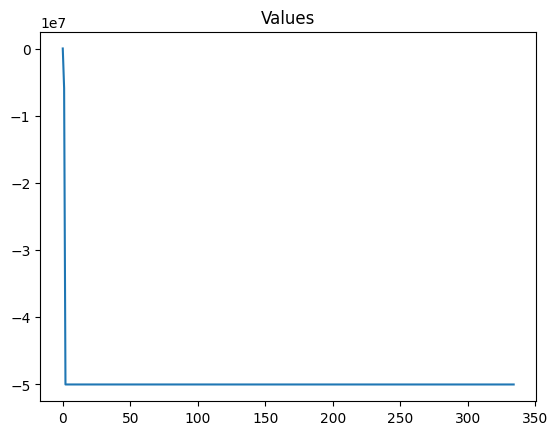

In [10]:
plt.plot(history_book['values'])
plt.title("Values")